# Empirical Constraints on the Black Hole Sun


[Earl Patrick Bellinger](https://earlbellinger.com)$^1$

$^1$_Max Planck Institute for Astrophysics, Garching, Germany_

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import integrate
from scipy import interpolate

import matplotlib as mpl
import matplotlib.pyplot as plt

import re
import tomso.gyre as gyre
import tomso.fgong as fgong

import tomso

from tqdm import tqdm_notebook as tqdm

In [4]:
import os
import seaborn as sns
sns.set(style="ticks", palette="muted", rc={"xtick.bottom" : True, "ytick.left" : True})
plt.style.use(os.environ['SCRIPTS_DIR'] + '/matplotlibrc')

In [6]:
normal = pd.read_table('LOGS_normal/history.data', skiprows=5, sep='\s+')
normal

,model_number,num_zones,star_age,log_dt,star_mass,log_xmstar,log_abs_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,center_h1,center_he4,center_c12,center_o16,surface_c12,surface_o16,total_mass_h1,total_mass_he4,num_retries,num_iters
0,1,706,1.000000e-05,-5.000000,1.0,33.298506,-99.0,0.0,1.0,0.003102,...,0.709298,0.272354,0.003119,0.008569,0.003119,0.008569,0.709298,0.272354,0,2
1,2,706,2.200000e-05,-4.920819,1.0,33.298506,-99.0,0.0,1.0,0.003188,...,0.709298,0.272354,0.003119,0.008569,0.003119,0.008569,0.709298,0.272354,0,2
2,3,706,3.640000e-05,-4.841638,1.0,33.298506,-99.0,0.0,1.0,0.003189,...,0.709298,0.272354,0.003119,0.008569,0.003119,0.008569,0.709298,0.272354,0,3
3,4,706,5.368000e-05,-4.762456,1.0,33.298506,-99.0,0.0,1.0,0.003188,...,0.709298,0.272354,0.003119,0.008569,0.003119,0.008569,0.709298,0.272354,0,2
4,5,706,7.441600e-05,-4.683275,1.0,33.298506,-99.0,0.0,1.0,0.003189,...,0.709298,0.272354,0.003119,0.008569,0.003119,0.008569,0.709298,0.272354,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,383,782,4.209833e+09,8.078868,1.0,33.298506,-99.0,0.0,1.0,0.980073,...,0.383424,0.597707,0.000017,0.008181,0.003119,0.008569,0.674472,0.306328,0,5
383,384,782,4.329011e+09,8.076196,1.0,33.298506,-99.0,0.0,1.0,0.980230,...,0.373266,0.607864,0.000017,0.008144,0.003119,0.008569,0.673324,0.307470,0,5
384,385,782,4.447447e+09,8.073482,1.0,33.298506,-99.0,0.0,1.0,0.980390,...,0.363106,0.618022,0.000018,0.008103,0.003119,0.008569,0.672171,0.308617,0,5
385,386,782,4.565136e+09,8.070737,1.0,33.298506,-99.0,0.0,1.0,0.980538,...,0.352945,0.628182,0.000018,0.008059,0.003119,0.008569,0.671015,0.309768,0,5


In [2]:
DF = pd.read_table('LOGS/history.data', skiprows=5, sep='\s+')
DF

,model_number,num_zones,star_age,log_dt,star_mass,log_xmstar,log_abs_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,center_h1,center_he4,center_c12,center_o16,surface_c12,surface_o16,total_mass_h1,total_mass_he4,num_retries,num_iters
0,1,706,1.000000e-05,-5.000000,1.0,33.298071,-99.0,0.0,1.0,0.001771,...,0.709298,0.272354,0.003119,0.008569,0.003119,0.008569,0.708588,0.272082,0,5
1,2,706,2.200000e-05,-4.920819,1.0,33.298071,-99.0,0.0,1.0,0.001717,...,0.709298,0.272354,0.003119,0.008569,0.003119,0.008569,0.708588,0.272082,0,2
2,3,706,3.640000e-05,-4.841638,1.0,33.298071,-99.0,0.0,1.0,0.001717,...,0.709298,0.272354,0.003119,0.008569,0.003119,0.008569,0.708588,0.272082,0,2
3,4,706,5.368000e-05,-4.762456,1.0,33.298071,-99.0,0.0,1.0,0.001717,...,0.709298,0.272354,0.003119,0.008569,0.003119,0.008569,0.708588,0.272082,0,3
4,5,706,7.441600e-05,-4.683275,1.0,33.298071,-99.0,0.0,1.0,0.001717,...,0.709298,0.272354,0.003119,0.008569,0.003119,0.008569,0.708588,0.272082,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,374,790,3.898149e+09,8.265871,1.0,33.298071,-99.0,0.0,1.0,0.982423,...,0.504944,0.476187,0.000014,0.008532,0.003119,0.008569,0.678085,0.301734,0,5
374,375,792,4.081785e+09,8.263958,1.0,33.298071,-99.0,0.0,1.0,0.982758,...,0.494832,0.486299,0.000014,0.008528,0.003119,0.008569,0.676445,0.303365,0,5
375,376,792,4.264603e+09,8.262020,1.0,33.298071,-99.0,0.0,1.0,0.983072,...,0.484720,0.496413,0.000014,0.008523,0.003119,0.008569,0.674790,0.305011,0,5
376,377,791,4.446598e+09,8.260058,1.0,33.298071,-99.0,0.0,1.0,0.983398,...,0.474605,0.506529,0.000014,0.008517,0.003119,0.008569,0.673120,0.306674,0,5


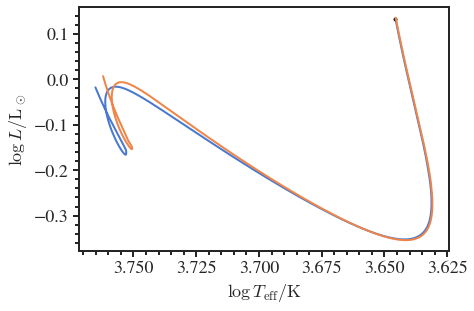

In [10]:
plt.plot(DF['log_Teff'], DF['log_L'])
plt.plot(DF['log_Teff'].values[0], DF['log_L'].values[0], 'k.')

plt.plot(normal['log_Teff'], normal['log_L'])

plt.gca().invert_xaxis()
plt.xlabel(r'$\log\,T_{\rm{eff}}/\rm{K}$')
plt.ylabel(r'$\log\,L/\rm{L}_\odot$')
#plt.suptitle('HRD')
plt.show()